##  Week 8: Time Series
### DSC 630 - Week Eight
### McKenzie Payne

#### You will be using the dataset us_retail_sales.csv for this assignment. This data gives the total monthly retail sales in the US from January 1992 until June 2021. With this dataset, complete the following steps:
1. Plot the data with proper labeling and make some observations on the graph.
2. Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.
3. Use the training set to build a predictive model for the monthly retail sales.
4. Use the model to predict the monthly retail sales on the last year of data.
5. Report the RMSE of the model predictions on the test set.

#### Step 1. Plot the data with proper labeling and make some observations on the graph.

> Here I converted the 'Date' column in the dataset to datetime format using `pd.to_datetime()` for further analysis and plotting.

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC'],
      dtype='object')


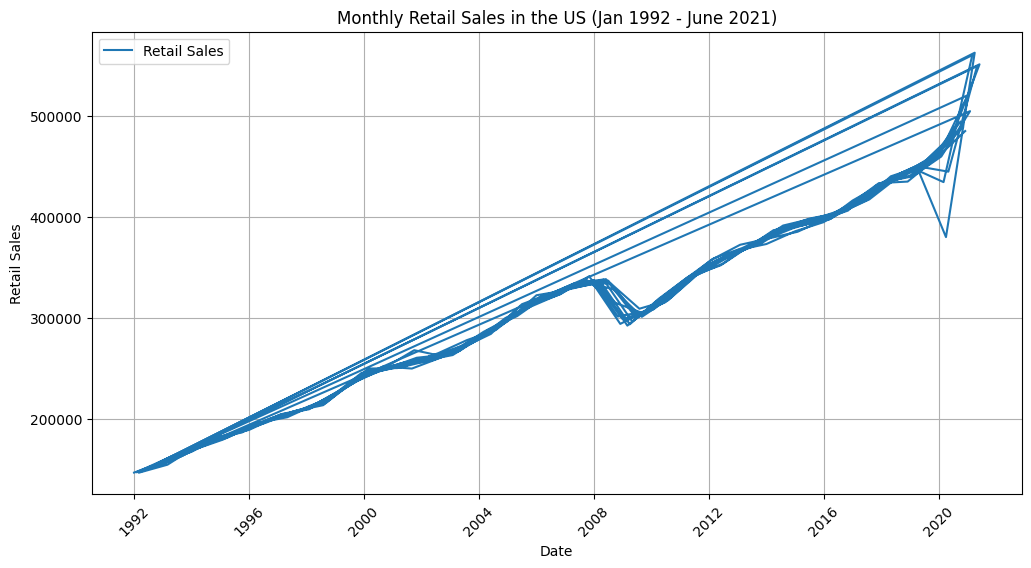

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_path = "C:/Users/mcken/OneDrive/Documents/us_retail_sales.csv"
df = pd.read_csv(data_path)

# Check the column names
print(df.columns)

# Create a new DataFrame for plotting
date_columns = ['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
monthly_sales = pd.melt(df, id_vars=['YEAR'], value_vars=date_columns, var_name='Month', value_name='Retail_Sales')

# Create a 'Date' column based on 'YEAR' and 'Month'
monthly_sales['Date'] = pd.to_datetime(monthly_sales['YEAR'].astype(str) + '-' + monthly_sales['Month'], format='%Y-%b')

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Retail_Sales'], label='Retail Sales')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.title('Monthly Retail Sales in the US (Jan 1992 - June 2021)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

#### Step 2. Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

> We will split the data into a training set and a test set. We'll use the data from July 2020 to June 2021 as the test set and the rest as the training set. 

In [2]:
# Define the test start and end dates
test_start_date = '2020-07-01'
test_end_date = '2021-06-30'

# Split the data into training and test sets
train_data = monthly_sales[monthly_sales['Date'] < test_start_date]
test_data = monthly_sales[(monthly_sales['Date'] >= test_start_date) & (monthly_sales['Date'] <= test_end_date)]

#### Step 3. Use the training set to build a predictive model for the monthly retail sales.

> We will use the training set (train_data) to build a predictive model for the monthly retail sales. Here, we'll use a simple linear regression model as an example.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Extract features (months) and target (retail sales)
X_train = train_data['Date'].dt.month.values.reshape(-1, 1)  # Month as numeric value
y_train = train_data['Retail_Sales'].values

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Step 4. Use the model to predict the monthly retail sales on the last year of data.

> Here I used the trained model to predict the monthly retail sales for the test period (July 2020 - June 2021).

In [4]:
# Extract features for test data
X_test = test_data['Date'].dt.month.values.reshape(-1, 1)  # Month as numeric value

# Make predictions using the model
y_pred = model.predict(X_test)

#### Step 5. Report the RMSE of the model predictions on the test set.

> Here we evaluate the model's performance by calculating the Root Mean Squared Error (RMSE) of the predicted monthly retail sales on the test set

In [10]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Example predictions and true values
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.6123724356957945
